## **LetsGrowMoreVIP - Data Science Internship (May '22)**

**INTERMEDIATE Level Task 2:Prediction using Decision Tree Algorithm**

1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

2.Reading the iris dataset

In [19]:
df = pd.read_csv("/content/iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


3.Data Processing

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
df.shape

(150, 6)

In [23]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [24]:
df = df.drop(['Id'], axis = 1)

In [25]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


4.Data Visualization

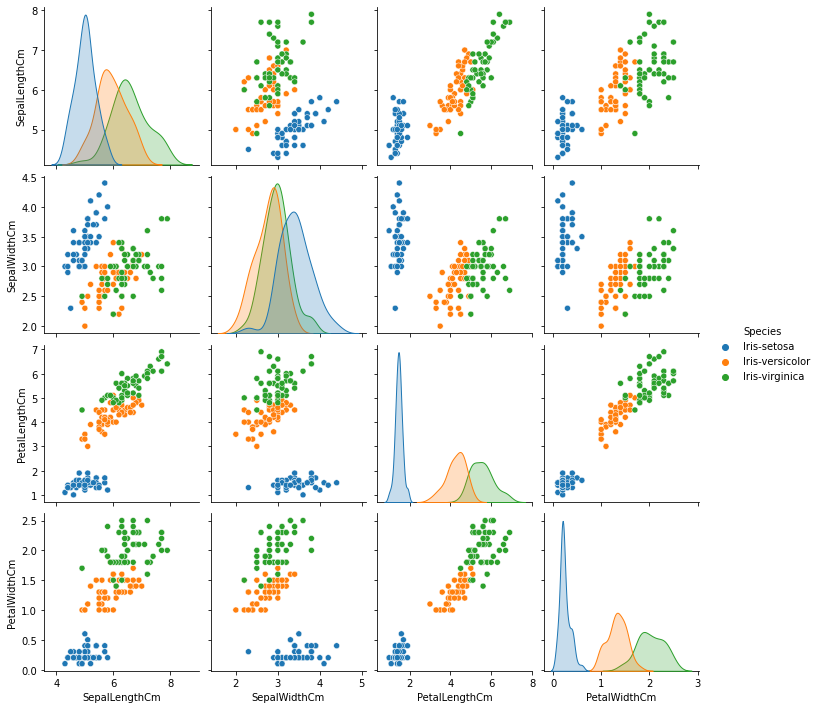

In [26]:
sns.pairplot(data = df, hue='Species') #pair-plot of the data
plt.show()

In [27]:
#Sepal Length V/S Sepal Width
fig = px.scatter(df, x="SepalLengthCm", y="SepalWidthCm", color='Species',symbol="Species",
                 title="Sepal Length V/S Sepal Width on the basis of Species",width=700,height=450)
fig.show()

In [28]:
#Petal Length V/S Petal Width
fig = px.scatter(df, x="PetalLengthCm", y="PetalWidthCm", color='Species',symbol="Species",
                 title="Petal Length v/s Petal Width on the basis of Species",width=700,height=450)
fig.show()

5.Building ML Models

In [29]:
# Splitting the dataset into train and test
X = df.drop(columns=['Species']) #independent
y = df['Species'] #dependent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
clsf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clsf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
print("Accuracy using decision tree: ",clsf.score(X_test, y_test) * 100,'%')

Accuracy using decision tree:  97.36842105263158 %


6.Decision Tree Visualization

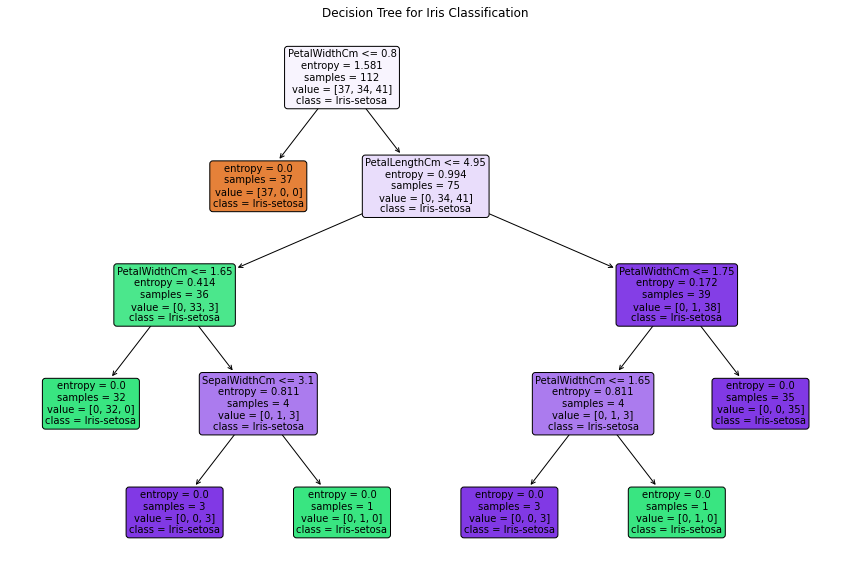

In [32]:
plt.figure(figsize=(15,10))
tree.plot_tree(clsf, feature_names=df.columns, 
                   class_names=df.Species, 
                   filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Iris Classification")
plt.show()